In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

## The dataset has  credit card transactions where our objective is to identify the fraudulent transactions

In [107]:
# Reading in the dataset
data = pd.read_csv("creditcard.csv")

In [108]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [109]:
# Checking the shape of our data
data.shape

(56962, 30)

In [110]:
# Checking the distribution of two classes in the target variable
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [101]:
98/56864 *100 

0.17234102419808667

## Clearly the dataset is heavily imbalanced!

## Creating the two datasets, one with all the independent variables and the other with our dependent variable

In [111]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

### Split the dataset into train and test using stratified sampling on our dependent variable. 
### Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets

In [112]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

### Check the shape of train and test datasets

In [113]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


### Check the distribution of classes of dependent variable in train and test

In [114]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45491
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11373
1       20
Name: Target, dtype: int64


### Training using Random Forest Classifier

In [115]:
# Create a rf_classifier object with number of trees set to 50
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=0)

# Fit the object to train dataset
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting on both train and test dataset using the fitted model

In [116]:
train_preds =  rf_classifier.predict(X_train)
test_preds  = rf_classifier.predict(X_test)

In [117]:
# Obtain accuracy on train set
accuracy_score(Y_train,train_preds)

0.9999780552568632

In [118]:
# Obtain accuracy on test set
accuracy_score(Y_test,test_preds)

0.9991222680593347

### Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [119]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.9935897435897436

In [120]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.824868108678449

In [121]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[45491,     0],
       [    1,    77]], dtype=int64)

In [122]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[11370,     3],
       [    7,    13]], dtype=int64)

## Plot the variable importance

In [123]:
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

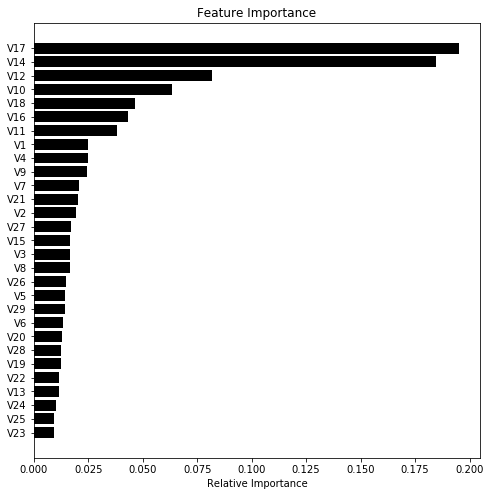

In [124]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()